In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
#2.1
def gauss(x,a=1,b=0,c=1):
    g = a*exp(-((x - b)**2/(2*(c**2))))
    return g

In [3]:
import functions

In [4]:
import sys
def printf(format, *args):
    sys.stdout.write(format % args)

In [5]:
result = gauss(1)
f = open("gaus_int.out", "w") 
sys.stdout = f
printf("the result is %.3f\n ",result)

In [6]:
#2.2
n = 100
x = linspace(-3.,5.,n)

<IPython.core.display.Javascript object>


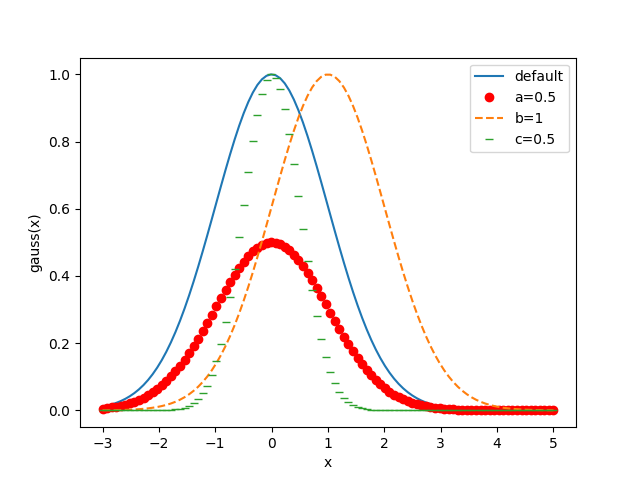

In [7]:
plot(x,gauss(x,1,0,1),'-',label = "default")
plot(x,gauss(x,0.5,0,1),'ro',label = "a=0.5")
plot(x,gauss(x,1,1,1),'--',label = "b=1")
plot(x,gauss(x,1,0,0.5),'_',label = "c=0.5")
legend(loc=0)
xlabel("x")
ylabel("gauss(x)")

In [8]:
#2.3.1
def sym_gauss_int_sqr(xb):
    n = 10
    width = 2*xb/n
    x_coors = linspace(-xb,xb-width,n)
    area = 0
    for x_coor in x_coors:
        height = 0.5 * (exp(-(x_coor**2)) + exp(-((x_coor+width)**2)))
        area = area + width*height
    return area

In [9]:
#2.3.2
result = sym_gauss_int_sqr(3)
printf("the square of the area between the interval -3 to 3 is %.3f\n ",result)

In [10]:
#2.3.3
def sym_gauss_int_sqr_test(xb,n):
    width = 2.0*xb/n
    x_coors = linspace(-xb,xb-width,n)
    area = 0
    for x_coor in x_coors:
        height = 0.5 * (exp(-(x_coor**2)) + exp(-((x_coor+width)**2 )))
        area = area + height * width
    return area

for i in range(1,100000):
    if abs((sym_gauss_int_sqr_test(3,i) - sym_gauss_int_sqr(3))) < 0.001:
        printf("The precision is better than 1.0e-03 for n >%.0f\n",i)
        break

In [11]:
#2.3.4
def sym_gauss_int_sqr_test2(xb):
    n = 6
    width = 2.0*xb/n
    x_coors = linspace(-xb,xb-width,n)
    area = 0
    for x_coor in x_coors:
        height = 0.5 * (exp(-(x_coor**2)) + exp(-((x_coor+width)**2 )))
        area = area + height * width
    return area

for i in range(1,100000):
    if(sym_gauss_int_sqr_test2(i/100)/np.sqrt(pi)) > 0.99:
        printf("Interval boundary  >=%.2f for > 0.99 of the square of the indefinite integral included.\n",i/100)
        break

<IPython.core.display.Javascript object>


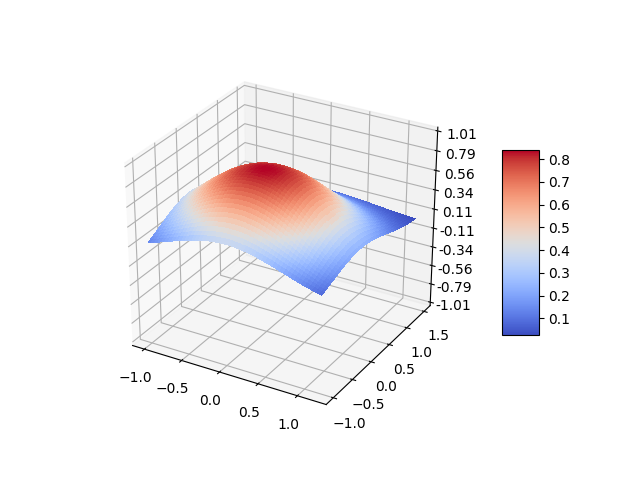

In [12]:
#2.4 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')

n=100
x = np.linspace(-1.,1.2,n)
y = np.linspace(-1.,1.5,n)
x, y = np.meshgrid(x, y)
h = np.exp(-(x**2+y**2))
z = np.sin(h)

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [13]:
#contour plot
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

<IPython.core.display.Javascript object>


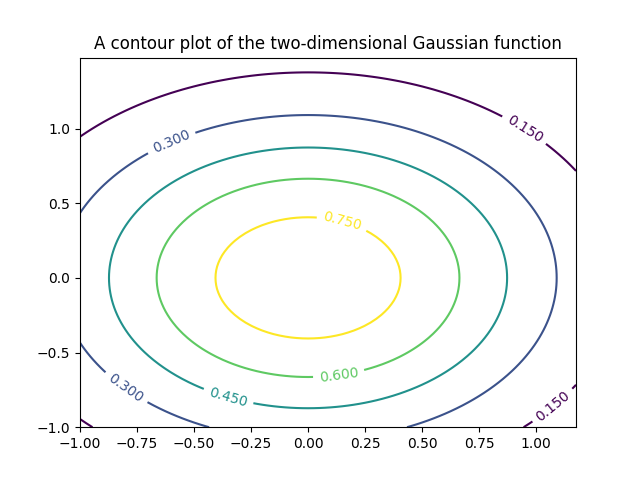

In [14]:
delta = 0.025
x = np.arange(-1.0, 1.2, delta)
y = np.arange(-1.0, 1.5, delta)
X, Y = np.meshgrid(x, y)
h = np.exp(-(X**2+Y**2))
Z = np.sin(h)
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('A contour plot of the two-dimensional Gaussian function')